In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DoAnAI/car.csv')

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
col_names=df.columns

In [ ]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


#Xử lý dữ liệu null

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

#Xử lý dữ liệu trùng lắp

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#Khai báo vector đặc trưng và biến mục tiêu

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
column_names = X.columns

#Mã hóa dữ liệu

In [ ]:
categories = [
    ['low', 'med', 'high', 'vhigh'],  # buying
    ['low', 'med', 'high', 'vhigh'],  # maint
    ['2', '3', '4', '5more'],         # doors
    ['2', '4', 'more'],               # persons
    ['small', 'med', 'big'],          # lug_boot
    ['low', 'med', 'high'],           # safety
]
# categories_y = [['unacc', 'acc', 'good', 'vgood']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder_sklearn = OrdinalEncoder(categories=categories)
X_encoded = encoder_sklearn.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)
X_encoded_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0


In [ ]:
X_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   buying    1728 non-null   float64
 1   maint     1728 non-null   float64
 2   doors     1728 non-null   float64
 3   persons   1728 non-null   float64
 4   lug_boot  1728 non-null   float64
 5   safety    1728 non-null   float64
dtypes: float64(6)
memory usage: 81.1 KB


In [ ]:
print("Mã hóa bằng sklearn.preprocessing:")
for i, col in enumerate(column_names):
    print(f"{col}:")
    categories = encoder_sklearn.categories_[i]
    for j, category in enumerate(categories):
        print(f"{category}: {j}")
    print()

Mã hóa bằng sklearn.preprocessing:
buying:
low: 0
med: 1
high: 2
vhigh: 3

maint:
low: 0
med: 1
high: 2
vhigh: 3

doors:
2: 0
3: 1
4: 2
5more: 3

persons:
2: 0
4: 1
more: 2

lug_boot:
small: 0
med: 1
big: 2

safety:
low: 0
med: 1
high: 2



#Xây dựng cây quyết định

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_en.fit(X_encoded_df, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn import tree
text_tree = tree.export_text(clf_en,feature_names=list(df.columns[:-1]))
print(text_tree)

|--- safety <= 0.50
|   |--- class: unacc
|--- safety >  0.50
|   |--- persons <= 0.50
|   |   |--- class: unacc
|   |--- persons >  0.50
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- lug_boot <= 0.50
|   |   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |   |--- doors >  0.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |--- lug_boot >  0.50
|   |   |   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |   |--- doors <= 1.50
|   |   |   |   |   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |   |   |--- doors >  0.50
|   |   |   |   |   |   |   |   |   |   |--- p

In [ ]:
class_names = y.unique().astype(str)
class_names

array(['unacc', 'acc', 'vgood', 'good'], dtype='<U5')

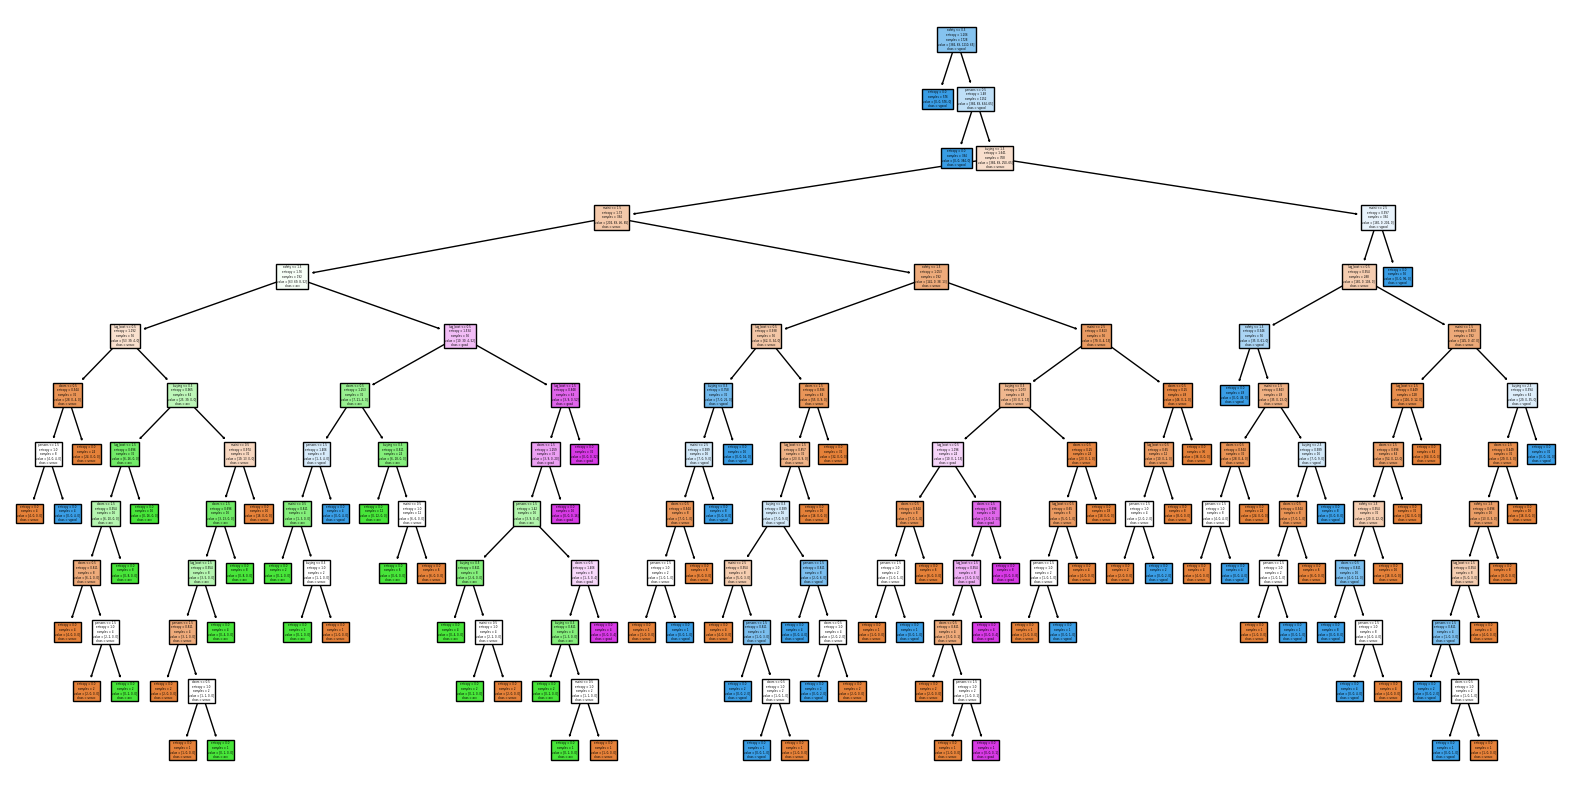

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf_en, feature_names=X_encoded_df.columns, class_names=class_names, filled=True)
plt.show()

In [ ]:
print("Depth of the tree:", clf_en.get_depth())
print("Number of leaves:", clf_en.get_n_leaves())

Depth of the tree: 12
Number of leaves: 84


#Phương pháp cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cv_scores = cross_val_score(clf_en, X_encoded_df, y, cv=15, scoring = 'accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")
print(f"Standalization cross-validation score: {cv_scores.std()}")

Cross-validation scores: [0.95689655 0.96551724 0.85344828 0.94782609 1.         0.97391304
 0.93913043 0.97391304 0.95652174 0.96521739 0.91304348 0.99130435
 0.91304348 0.90434783 0.82608696]
Mean cross-validation score: 0.9386806596701649
Standalization cross-validation score: 0.04733250810579168


In [ ]:
y_pred = cross_val_predict(clf_en, X_encoded_df, y, cv=15)

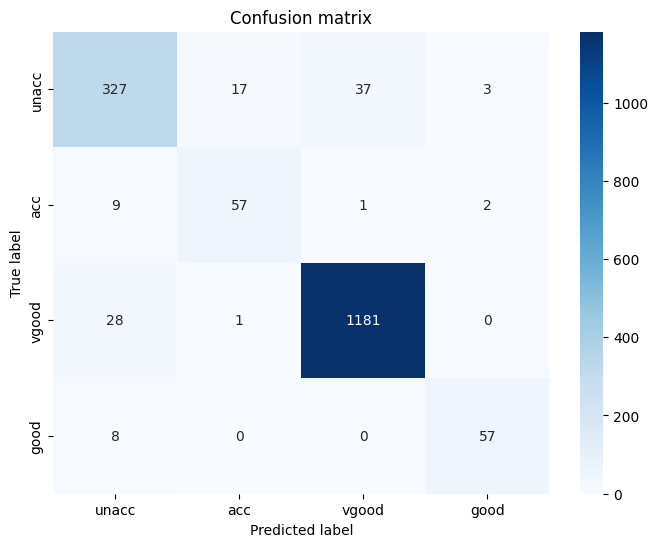

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.87       384
        good       0.76      0.83      0.79        69
       unacc       0.97      0.98      0.97      1210
       vgood       0.92      0.88      0.90        65

    accuracy                           0.94      1728
   macro avg       0.88      0.88      0.88      1728
weighted avg       0.94      0.94      0.94      1728

